In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('salary_data_cleaned.csv')

In [20]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [21]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [22]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [23]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [24]:
# Fix state Los Angeles 
df['States of jobs']= df['States of jobs'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['States of jobs'].value_counts()


CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
MI      6
DE      6
KY      6
CT      5
IA      5
NE      4
OR      4
LA      4
NM      3
KS      3
MN      2
ID      2
SC      1
RI      1
Name: States of jobs, dtype: int64

In [25]:
df.iloc[: , -15:]

,max_salary,avg_salary,company_details,States of jobs,same_state,age,python_yn,R_yn,spark,aws,excel,ML,Stats,job_simp,seniority
0,91,72.0,Tecolote Research\n,NM,0,49,1,0,0,0,1,1,0,data scientist,na
1,112,87.5,University of Maryland Medical System\n,MD,0,38,1,0,0,0,0,1,1,data scientist,na
2,90,85.0,KnowBe4\n,FL,1,12,1,0,1,0,1,1,1,data scientist,na
3,97,76.5,PNNL\n,WA,1,57,1,0,0,0,0,1,1,data scientist,na
4,143,114.5,Affinity Solutions\n,NY,1,24,1,0,0,0,1,1,1,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,111,84.5,GSK\n,MA,0,192,0,0,0,1,0,0,0,na,senior
738,133,102.5,Eventbrite\n,TN,0,16,1,0,1,1,0,1,0,data engineer,senior
739,91,73.5,Software Engineering Institute\n,PA,1,38,0,0,0,0,1,1,1,na,na
740,160,127.5,"Numeric, LLC\n",PA,0,-1,0,0,0,0,1,1,0,manager,na


In [26]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [27]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_details', 'States of jobs', 'same_state', 'age', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'ML', 'Stats', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [30]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.Hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.Hourly ==1 else x.max_salary, axis =1)

In [34]:
df[df.Hourly ==1][['Hourly','min_salary','max_salary']]

,Hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [37]:
df['company_details'] = df.company_details.apply(lambda x: x.replace('\n', ''))

In [ ]:
eda

In [38]:
df.describe()

,Rating,Founded,Hourly,Employer Provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,ML,Stats,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.0,74.719677,128.149596,100.626011,0.557951,48.456873,0.528302,0.002695,0.225067,0.237197,0.522911,0.424528,0.373315,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.0,30.980593,45.220324,38.855948,0.496965,53.900445,0.499535,0.051882,0.417908,0.425651,0.499812,0.494605,0.484011,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.0,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.0,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.0,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.0,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,0.0,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<AxesSubplot:>

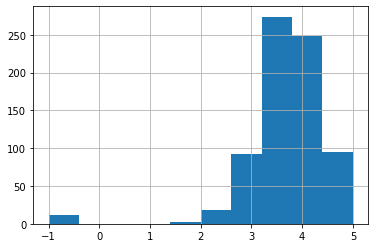

In [39]:
df.Rating.hist()

<AxesSubplot:>

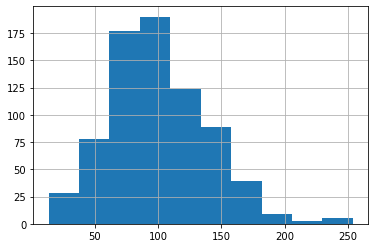

In [40]:
df.avg_salary.hist()

<AxesSubplot:>

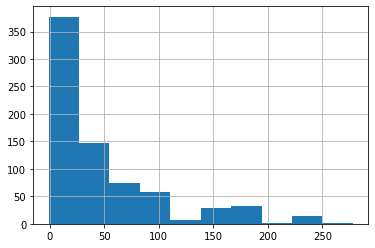

In [41]:
df.age.hist()
#doesnt look normal, so if we have to use it in future , we wil have to normalise it, specially if we are doing regression

<AxesSubplot:>

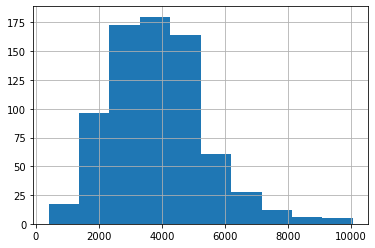

In [42]:
df.desc_len.hist()

<AxesSubplot:>

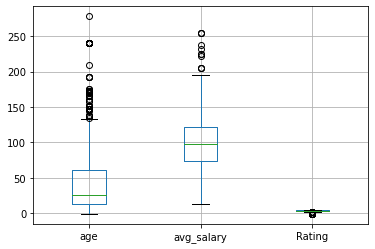

In [43]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

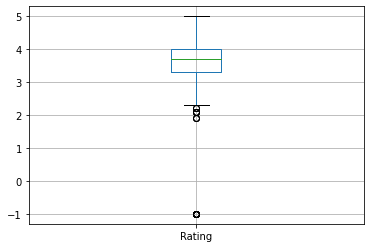

In [44]:
df.boxplot(column = 'Rating')

In [45]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019492,0.024665,0.164461
avg_salary,0.019492,1.000000,0.013492,0.078808
Rating,0.024665,0.013492,1.000000,-0.012281
desc_len,0.164461,0.078808,-0.012281,1.000000


<AxesSubplot:>

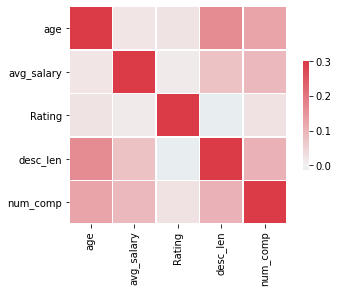

In [46]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [51]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry',
             'Sector', 'Revenue', 'company_details','States of jobs','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

In [52]:
df_cat

,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,company_details,States of jobs,same_state,python_yn,R_yn,spark,aws,excel,job_simp,seniority
0,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),Tecolote Research,NM,0,1,0,0,0,1,data scientist,na
1,"Linthicum, MD","Baltimore, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),University of Maryland Medical System,MD,0,1,0,0,0,0,data scientist,na
2,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),KnowBe4,FL,1,1,0,1,0,1,data scientist,na
3,"Richland, WA","Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),PNNL,WA,1,1,0,0,0,0,data scientist,na
4,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Affinity Solutions,NY,1,1,0,0,0,1,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),GSK,MA,0,0,0,0,1,0,na,senior
738,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,Company - Public,Internet,Information Technology,$100 to $500 million (USD),Eventbrite,TN,0,1,0,1,1,0,data engineer,senior
739,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,Software Engineering Institute,PA,1,0,0,0,0,1,na,na
740,"Allentown, PA","Chadds Ford, PA",1 to 50 employees,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),"Numeric, LLC",PA,0,0,0,0,0,1,manager,na


graph for Location: total = 200


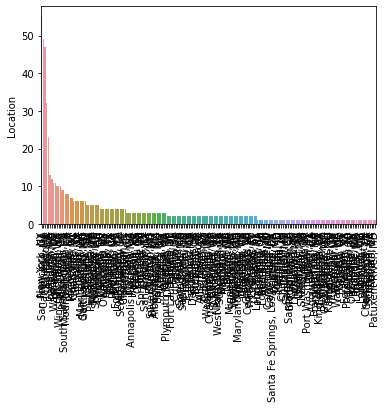

graph for Headquarters: total = 198


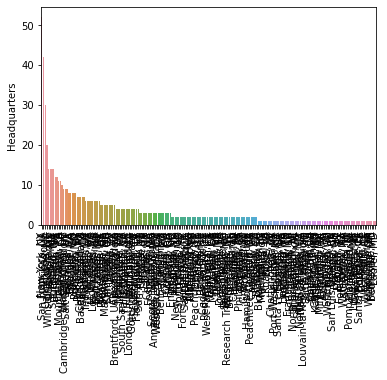

graph for Size: total = 9


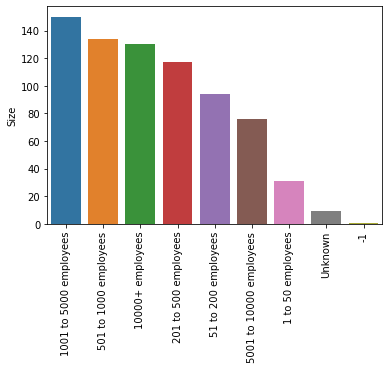

graph for Type of ownership: total = 11


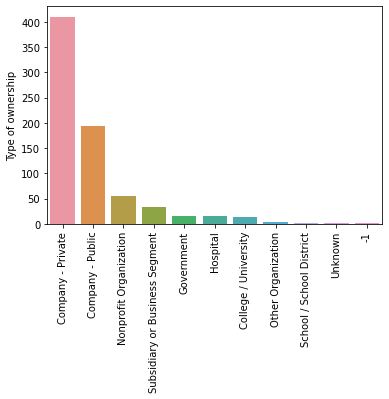

graph for Industry: total = 60


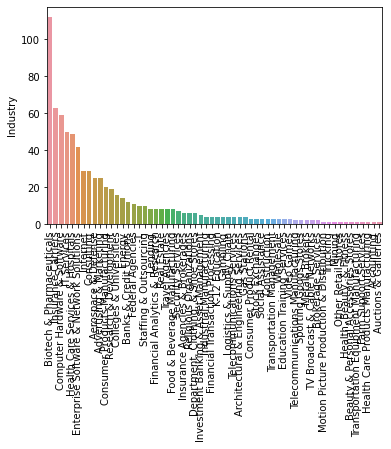

graph for Sector: total = 25


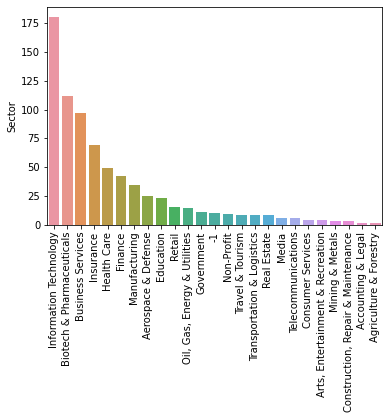

graph for Revenue: total = 14


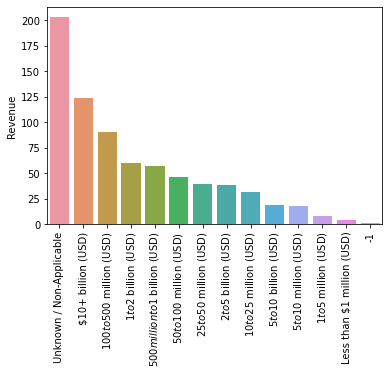

graph for company_details: total = 343


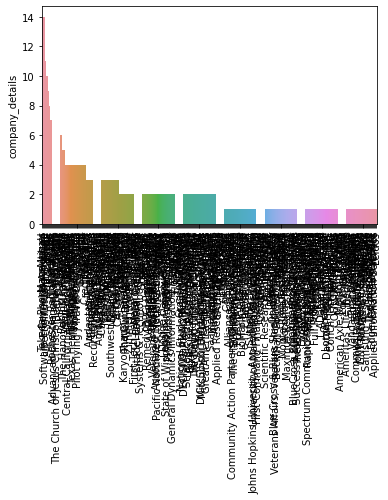

graph for States of jobs: total = 37


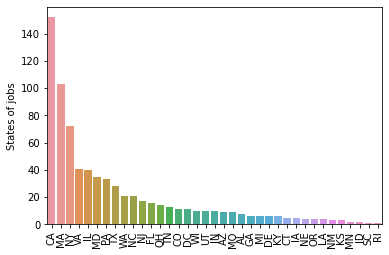

graph for same_state: total = 2


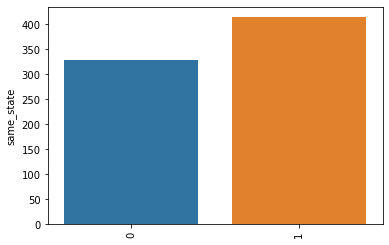

graph for python_yn: total = 2


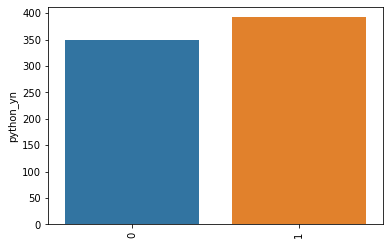

graph for R_yn: total = 2


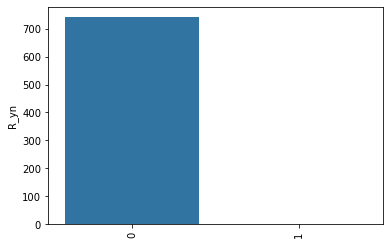

graph for spark: total = 2


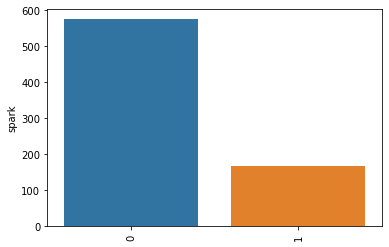

graph for aws: total = 2


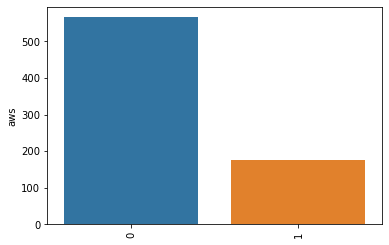

graph for excel: total = 2


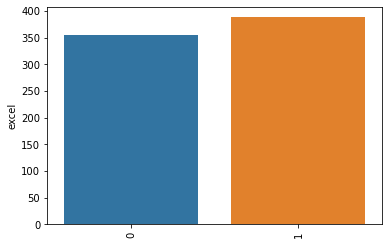

graph for job_simp: total = 7


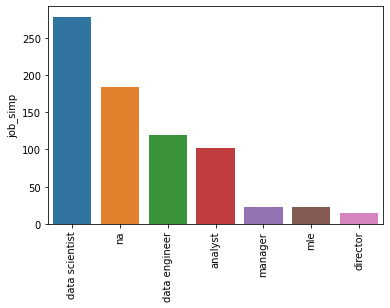

graph for seniority: total = 3


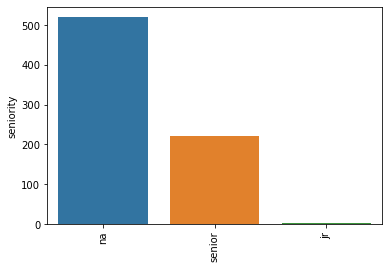

In [53]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


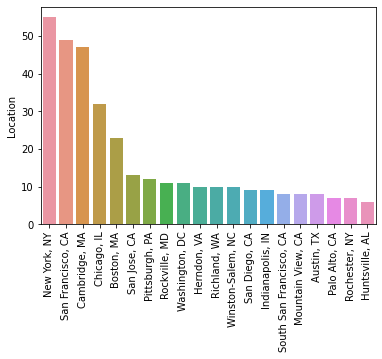

graph for Headquarters: total = 20


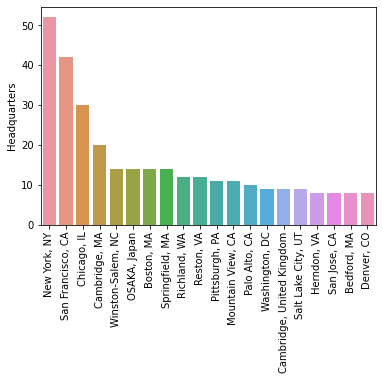

graph for company_details: total = 20


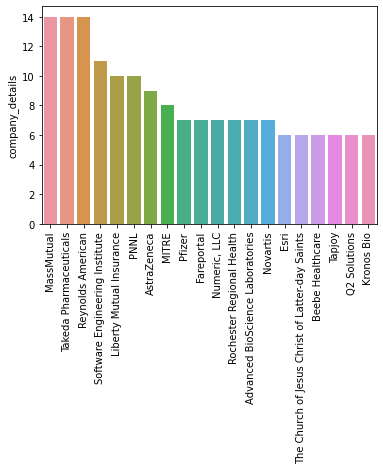

In [56]:
for i in df_cat[['Location','Headquarters','company_details']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [57]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [58]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [62]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [63]:
pd.pivot_table(df, index = ['States of jobs','job_simp'], values = 'avg_salary'
              ).sort_values('States of jobs', ascending = False)

avg_salary
States of jobs job_simp                  
WI             na               54.000000
               data scientist  113.500000
               analyst          58.833333
WA             na               97.500000
               data scientist   99.764706
               analyst          54.500000
VA             na               79.300000
               mle              87.000000
               data scientist  108.416667
               data engineer    96.900000
               analyst          71.583333
UT             data engineer   100.333333
               analyst          54.750000
               data scientist  140.500000
TX             na               41.285714
               data scientist  100.730769
               data engineer   113.062500
TN             data scientist   96.000000
               data engineer   100.950000
               analyst          13.500000
SC             na               60.500000
RI             analyst         100.000000
PA             manager         109.666667
               data engineer    91.500000
               data scientist  113.333333
               analyst          62.750000
               mle             120.500000
               na               76.062500
OR             data scientist   98.500000
               data engineer    73.000000
OH             na               91.166667
               data scientist  105.285714
               analyst          53.875000
NY             na               81.583333
               mle             125.000000
               data scientist  115.250000
               data engineer    86.375000
               analyst          65.607143
NM             data scientist   74.333333
NJ             data scientist  106.875000
               analyst          83.583333
               data engineer   112.000000
               manager         109.500000
               director        161.500000
               na               82.500000
NE             na               41.000000
NC             na               90.916667
               data scientist  117.000000
               data engineer   104.250000
MO             na               72.333333
               manager          40.500000
               data scientist  127.666667
               analyst          61.000000
MN             data engineer    95.000000
               analyst          76.000000
MI             manager          87.500000
               data scientist  106.625000
MD             na               88.750000
               data scientist  109.115385
               data engineer   109.000000
               analyst          80.666667
MA             na              107.478261
               manager          71.900000
               director        117.833333
               data scientist  113.750000
               data engineer   107.291667
               analyst          59.125000
LA             analyst          48.000000
               data engineer    70.500000
               na               20.000000
KY             na              103.500000
               data scientist   84.000000
KS             mle              87.000000
IN             na               69.000000
               data scientist   84.500000
               data engineer   114.500000
IL             analyst          66.500000
               na               57.166667
               mle             133.000000
               director        221.750000
               data scientist  117.233333
               data engineer    96.125000
ID             analyst          56.250000
IA             analyst          43.000000
               data engineer   102.833333
GA             data scientist   81.333333
               na               80.000000
FL             data scientist   97.357143
               data engineer    91.833333
               analyst          47.500000
DE             na               27.500000
DC             data scientist  149.000000
               data engineer    85.000000
               analyst          63.500000

In [66]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'States of jobs',
               values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
States of jobs,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [68]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_details', 'States of jobs', 'same_state', 'age', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'ML', 'Stats', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [77]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'Hourly', 'Employer Provided', 
               'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [78]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [79]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [81]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

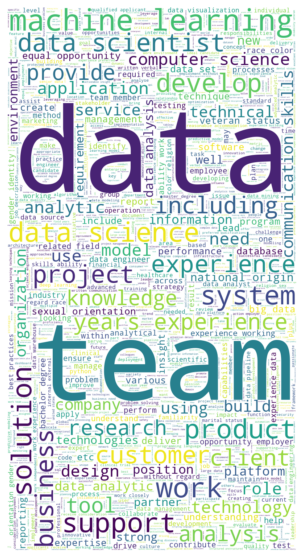

In [82]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()